Q1. How many multiplications and additions do you need to perform a matrix multiplication between a (n, k) and (k, m) matrix? Explain

general step is to multiply 1st Row of matrix a by 1st column of matrix b
and then continue till reaching last column and then repeat for the next row 

we have n rows in matrix a : muliplying n rows 
we have in each row k elements : therefore for each row k multiplications 
we have in m columsn in matrix b : each n*k multiplications are going to happen fo each column

thus number of multiplications is n*k*m

Now for Additions , Similarly for each row of matrix a there will be k-1 additions
there are m columsn therfore (k-1)*m additions 
finally there are n rows thus number of addtions are n*(k-1)*m

Q2.Write Python code to multiply the above two matrices. Solve using list of lists and then use numpy. Compare the timing of both solutions. Which one is faster? Why?

In [104]:
import random 
import timeit
import numpy as np 

def gen_mat(n,m) :
    rand_list  = []
    for i in range(n):
        rand_list.append(random.sample(range(1,50),m))

    return rand_list

def mat_multiply(mat1,mat2):
    if len(mat1[0]) != len(mat2):
        raise ValueError()
    
    result = []
    for i in range(len(mat1)):
        for j in range(len(mat2[0])):
            result[i][j]=0
    
    for i in range(len(mat1)):
        for j in range(len(mat2[0])):
            for k in range(len(mat2)):
                result[i][j] += mat1[i][k] * mat2[k][j]
    
    return result

mat1 = gen_mat(3,2)
mat2 = gen_mat(2,3);

custom_method_time = timeit.timeit(lambda: mat_multiply(mat1,mat2),number=1000)
numpy_method_time = timeit.timeit(lambda:np.dot(mat1,mat2),number=1000)

print(custom_method_time)
print(numpy_method_time)


IndexError: list index out of range

Q3.finding median 

In [45]:
import random 
import numpy
import timeit
def get_median_sorted(arr,n):
    sorted(arr)
    if n%2 != 0:
        return float(arr[int (n/2)])
    
    return float(( arr[int((n-1)/2)] + arr[int((n/2))]) /2 )

def get_median_unsorted(arr,n):
    temp = arr.copy()
    highest = max(temp)
    temp.remove(highest)
    sec_highest = max(temp)
    return (highest+sec_highest) / 2

arr= random.sample(range(1,10000),500)
n=500
np_arr= numpy.random.randint(10000,size=500)

sorted_method_time = timeit.timeit(lambda:get_median_sorted(arr,n),number=500)
unsorted_method_time = timeit.timeit(lambda:get_median_unsorted(arr,n),number=500)
numpy_time = timeit.timeit(lambda:numpy.median(arr,axis=0),number=500)
print(sorted_method_time)
print(unsorted_method_time)
print(numpy_time)

    

0.00778765100039891
0.004826004998903954
0.019419672000367427


Q4.What is the gradient of the following function with respect to x and y? 

gradient with respect to x is  2*x*y + (y^3)cos(x)
gradient with respect to y x^2 + 3*(y^2)sin(x)

gradient of {(x^2)*y + (y^3)sin(x)} = (2*x*y + (y^3)cos(x), x^2 + 3*(y^2)sin(x))

Q5.Use JAX to confirm the gradient evaluated by your method matches the analytical solution corresponding to a few random values of x and y

Q6.Use sympy to confirm that you obtain the same gradient analytically.


In [ ]:
import sympy as sp

x, y = sp.symbols('x y')

f_x_y = x**2 * y + y*2 * sp.sin(x)

# Calculate the partial derivatives symbolically
df_dx = sp.diff(f, x)
df_dy = sp.diff(f, y)

# Print the symbolic results
print("Symbolic Partial Derivative with respect to x:", df_dx)
print("Symbolic Partial Derivative with respect to y:", df_dy)

Q7.Create a Python nested dictionary to represent hierarchical information. We want to store record of students and their marks. Something like:


In [106]:
dict = {
    2022: {
        'Branch 1': {
            1: {
               'Roll Number': 1,'Name': 'N','Marks': {'Maths': 100,'English': 70 }
            }
        },
        'Branch 2': {}
    } ,
    2023:{
        'Branch 1': {},
        'Branch 2': {}
    },
    2024:{
        'Branch 1': {},
        'Branch 2': {}
    },
    2025:{
        'Branch 1': {},
        'Branch 2': {}
    }
}
dict

{2022: {'Branch 1': {1: {'Roll Number': 1,
    'Name': 'N',
    'Marks': {'Maths': 100, 'English': 70}}},
  'Branch 2': {}},
 2023: {'Branch 1': {}, 'Branch 2': {}},
 2024: {'Branch 1': {}, 'Branch 2': {}},
 2025: {'Branch 1': {}, 'Branch 2': {}}}

Q8.Store the same information using Python classes. We have an overall database which is a list of year objects. Each year contains a list of branches. Each branch contains a list of students. Each student has some properties like name, roll number and has marks in some subjects.

In [107]:
class Student:
    def __init__(self, roll_number, name):
        self.roll_number = roll_number
        self.name = name
        self.marks = {}

    def add_subject_mark(self, subject, mark):
        self.marks[subject] = mark


class Branch:
    def __init__(self, name):
        self.name = name
        self.students = []

    def add_student(self, student):
        self.students.append(student)


class Year:
    def __init__(self, year):
        self.year = year
        self.branches = []

    def add_branch(self, branch):
        self.branches.append(branch)


# instances of given example
year_2022 = Year(2022)

branch_1_2022 = Branch("Branch 1")
student_1_2022 = Student(1, "N")
student_1_2022.add_subject_mark("Maths", 100)
student_1_2022.add_subject_mark("English", 70)
branch_1_2022.add_student(student_1_2022)

branch_2_2022 = Branch("Branch 2")

year_2022.add_branch(branch_1_2022)
year_2022.add_branch(branch_2_2022)

year_2023 = Year(2023)
branch_1_2023 = Branch("Branch 1")
branch_2_2023 = Branch("Branch 2")
year_2023.add_branch(branch_1_2023)
year_2023.add_branch(branch_2_2023)

year_2024 = Year(2024)
branch_1_2024 = Branch("Branch 1")
branch_2_2024 = Branch("Branch 2")
year_2024.add_branch(branch_1_2024)
year_2024.add_branch(branch_2_2024)

year_2025 = Year(2025)
branch_1_2025 = Branch("Branch 1")
branch_2_2025 = Branch("Branch 2")
year_2025.add_branch(branch_1_2025)
year_2025.add_branch(branch_2_2025)

# Creating a database as a list of year objects
database = [year_2022, year_2023, year_2024, year_2025]

# Accessing data
for year in database:
    print(year.year)
    for branch in year.branches:
        print(f"    {branch.name}")
        for student in branch.students:
            print(f"        Roll Number: {student.roll_number}, Name: {student.name}, Marks: {student.marks}")

2022
    Branch 1
        Roll Number: 1, Name: N, Marks: {'Maths': 100, 'English': 70}
    Branch 2
2023
    Branch 1
    Branch 2
2024
    Branch 1
    Branch 2
2025
    Branch 1
    Branch 2


Q9.plot the functions 

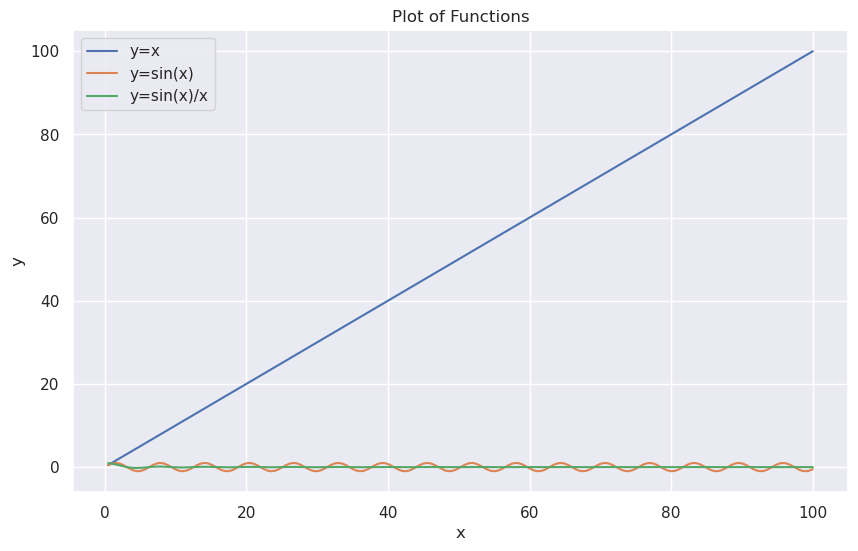

In [76]:
import matplotlib.pyplot as plt
import numpy as np

num_steps = int((100.0 - 0.5) / 0.5) + 1
x_values = np.linspace(0.5, 100.0, num_steps)

y_x= x_values
y_x2 = (x_values)**2
y_x3 = (x_values**3)*0.001
y_x4 = np.sin(x_values)
y_x5 = (np.sin(x_values))/x_values
y_x6 = np.log(x)
y_x7 = np.exp(x_values)


# Plot the functions
plt.figure(figsize=(10, 6))

plt.plot(x_values,y_x,label='y=x')
# plt.plot(x_values,y_x2,label='y=x^2')
# plt.plot(x_values,y_x3,label='y=x^3/100')
plt.plot(x_values,y_x4,label='y=sin(x)')
plt.plot(x_values,y_x5,label='y=sin(x)/x')
# plt.plot(x_values,y_x6,label='y=log(x)')
# plt.plot(x_values,y_x7,label='y=e^x')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of Functions')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()


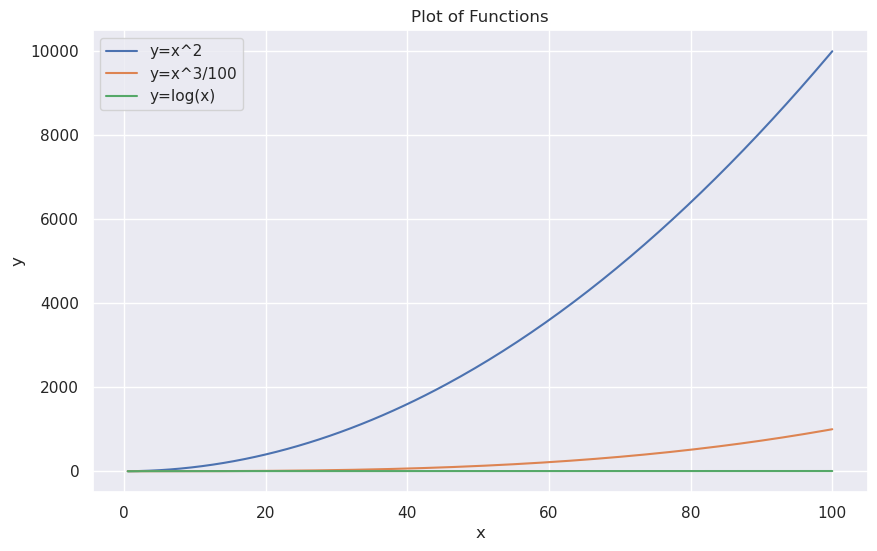

In [78]:
import matplotlib.pyplot as plt
import numpy as np

num_steps = int((100.0 - 0.5) / 0.5) + 1
x_values = np.linspace(0.5, 100.0, num_steps)

y_x= x_values
y_x2 = (x_values)**2
y_x3 = (x_values**3)*0.001
y_x4 = np.sin(x_values)
y_x5 = (np.sin(x_values))/x_values
y_x6 = np.log(x)
y_x7 = np.exp(x_values)


# Plot the functions
plt.figure(figsize=(10, 6))

# plt.plot(x_values,y_x,label='y=x')
plt.plot(x_values,y_x2,label='y=x^2')
plt.plot(x_values,y_x3,label='y=x^3/100')
# plt.plot(x_values,y_x4,label='y=sin(x)')
# plt.plot(x_values,y_x5,label='y=sin(x)/x')
plt.plot(x_values,y_x6,label='y=log(x)')
# plt.plot(x_values,y_x7,label='y=e^x')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of Functions')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()


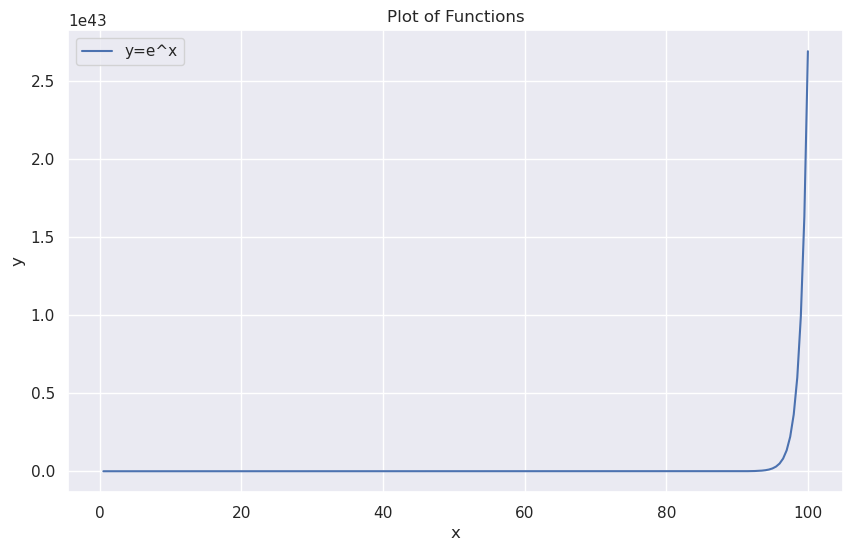

In [79]:
import matplotlib.pyplot as plt
import numpy as np

num_steps = int((100.0 - 0.5) / 0.5) + 1
x_values = np.linspace(0.5, 100.0, num_steps)

y_x= x_values
y_x2 = (x_values)**2
y_x3 = (x_values**3)*0.001
y_x4 = np.sin(x_values)
y_x5 = (np.sin(x_values))/x_values
y_x6 = np.log(x)
y_x7 = np.exp(x_values)


# Plot the functions
plt.figure(figsize=(10, 6))

# plt.plot(x_values,y_x,label='y=x')
# # plt.plot(x_values,y_x2,label='y=x^2')
# # plt.plot(x_values,y_x3,label='y=x^3/100')
# plt.plot(x_values,y_x4,label='y=sin(x)')
# plt.plot(x_values,y_x5,label='y=sin(x)/x')
# # plt.plot(x_values,y_x6,label='y=log(x)')
plt.plot(x_values,y_x7,label='y=e^x')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of Functions')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()


Q10.Using numpy generate a matrix of size 20X5 containing random numbers drawn uniformly from the range of 1 to 2. Using Pandas create a dataframe out of this matrix. Name the columns of the dataframe as “a”, “b”, “c”, “d”, “e”. Find the column with the highest standard deviation. Find the row with the lowest mean.

In [111]:
import pandas as pd 
np.random.seed(42)
mat = np.random.uniform(1,2,size=(20,5))

data = pd.DataFrame(mat, columns=['a', 'b', 'c', 'd', 'e'])

print(data)

high_sd_col = data.std().idxmax()
print('highest standard deviatioin:' , high_sd_col)

low_mean_row = data.mean(axis=1).idxmin()
print('lowest mean row:',low_mean_row)

           a         b         c         d         e
0   1.374540  1.950714  1.731994  1.598658  1.156019
1   1.155995  1.058084  1.866176  1.601115  1.708073
2   1.020584  1.969910  1.832443  1.212339  1.181825
3   1.183405  1.304242  1.524756  1.431945  1.291229
4   1.611853  1.139494  1.292145  1.366362  1.456070
5   1.785176  1.199674  1.514234  1.592415  1.046450
6   1.607545  1.170524  1.065052  1.948886  1.965632
7   1.808397  1.304614  1.097672  1.684233  1.440152
8   1.122038  1.495177  1.034389  1.909320  1.258780
9   1.662522  1.311711  1.520068  1.546710  1.184854
10  1.969585  1.775133  1.939499  1.894827  1.597900
11  1.921874  1.088493  1.195983  1.045227  1.325330
12  1.388677  1.271349  1.828738  1.356753  1.280935
13  1.542696  1.140924  1.802197  1.074551  1.986887
14  1.772245  1.198716  1.005522  1.815461  1.706857
15  1.729007  1.771270  1.074045  1.358466  1.115869
16  1.863103  1.623298  1.330898  1.063558  1.310982
17  1.325183  1.729606  1.637557  1.887213  1.

Q11.Add a new column to the dataframe called “f” which is the sum of the columns “a”, “b”, “c”, “d”, “e”. Create another column called “g”. The value in the column “g” should be “LT8” if the value in the column “f” is less than 8 and “GT8” otherwise. Find the number of rows in the dataframe where the value in the column “g” is “LT8”. Find the standard deviation of the column “f” for the rows where the value in the column “g” is “LT8” and “GT8” respectively.

In [112]:
data['f'] = data[['a', 'b', 'c', 'd', 'e']].sum(axis=1)
data['g'] = np.where(data['f'] < 8, 'LT8', 'GT8')
print(data)

LT8_cnt = (data['g'] == 'LT8').sum()
print('LT8_cnt: ', LT8_cnt)

std_lt8 = data.loc[data['g'] == 'LT8', 'f'].std()
std_gt8 = data.loc[data['g'] == 'GT8', 'f'].std()

print('standard deviation lt8: ', std_lt8)
print('standard deviation gt8: ', std_gt8)

           a         b         c         d         e         f    g
0   1.374540  1.950714  1.731994  1.598658  1.156019  7.811925  LT8
1   1.155995  1.058084  1.866176  1.601115  1.708073  7.389442  LT8
2   1.020584  1.969910  1.832443  1.212339  1.181825  7.217101  LT8
3   1.183405  1.304242  1.524756  1.431945  1.291229  6.735577  LT8
4   1.611853  1.139494  1.292145  1.366362  1.456070  6.865923  LT8
5   1.785176  1.199674  1.514234  1.592415  1.046450  7.137949  LT8
6   1.607545  1.170524  1.065052  1.948886  1.965632  7.757638  LT8
7   1.808397  1.304614  1.097672  1.684233  1.440152  7.335069  LT8
8   1.122038  1.495177  1.034389  1.909320  1.258780  6.819704  LT8
9   1.662522  1.311711  1.520068  1.546710  1.184854  7.225866  LT8
10  1.969585  1.775133  1.939499  1.894827  1.597900  9.176944  GT8
11  1.921874  1.088493  1.195983  1.045227  1.325330  6.576907  LT8
12  1.388677  1.271349  1.828738  1.356753  1.280935  7.126452  LT8
13  1.542696  1.140924  1.802197  1.074551  1.98

Q12.Explain Broadcasting in numpy 

Ans. Since Pyhton loops are slow we need tot vectorize operations. Similar to numpys ufunc's broadcasting is another way to vectorize operatioons 
Bradcasting helps us to use binary ufuncs between arrys of different diemensions 

In [91]:
import numpy as np 

a = np.random.randint(10,size=(3,3))
b=np.random.randint(10,size=3)
print(b.shape)
print(a.shape)

a+b
print((a+b).shape) #here bradcasting is used 


(3,)
(3, 3)
(3, 3)


Q13. Write a function to compute the argmin of a numpy array. The function should take a numpy array as input and return the index of the minimum element. You can use the np.argmin function to verify your solution

In [99]:
import numpy as np

def get_argmin(arr):
    min_index = 0;
    for i in range(len(arr)):
        if arr[i] < arr[min_index] :
            min_index = i
    
    return min_index

arr = np.array([2,4,2,32,1])
print(np.argmin(arr))
print(get_argmin(arr))


4
4
